In [1]:
!pip list

Package          Version 
---------------- --------
backcall         0.1.0   
certifi          2019.3.9
chardet          3.0.4   
cycler           0.10.0  
decorator        4.4.0   
deepdish         0.3.6   
future           0.17.1  
hypertools       0.5.1   
idna             2.8     
imageio          2.5.0   
ipykernel        5.1.0   
ipython          7.4.0   
ipython-genutils 0.2.0   
jedi             0.13.3  
joblib           0.13.2  
jupyter-client   5.2.4   
jupyter-core     4.4.0   
kiwisolver       1.0.1   
llvmlite         0.28.0  
matplotlib       3.0.3   
mock             2.0.0   
nibabel          2.4.0   
nilearn          0.5.2   
numba            0.43.1  
numexpr          2.6.9   
numpy            1.16.3  
pandas           0.24.2  
parso            0.4.0   
pbr              5.1.3   
pexpect          4.7.0   
pickleshare      0.7.5   
Pillow           6.0.0   
pip              19.0.3  
ppca             0.0.4   
prompt-toolkit   2.0.9   
ptyprocess       0.6.0   
Pygments    

In [2]:
import supereeg as se
import numpy as np
import pandas as pd
from nilearn import plotting as ni_plt
import pdb

def plot_ecog_electrodes_mni_from_file(mni_coords_fullfile,chan_num_min=-1,chan_num_max=-1,num_grid_chans=64,colors=list()):
    'Plots ECoG electrodes from MNI coordinate file'
    #Example code to run it: 
         #import sys
         #sys.path.append('/home/stepeter/AJILE/stepeter_sandbox/ECoG_Preprocessing')
         #from plot_ecog_electrodes_mni import *

         #mni_coords_fullfile='/data2/users/stepeter/mni_coords/a0f66459/294e1c_Trodes_MNIcoords.txt'
         #plot_ecog_electrodes_mni(mni_coords_fullfile,chan_num_min=-1,chan_num_max=-1,num_grid_chans=64)
        
    #NOTE: A warning may pop up the first time running it, leading to no output. Rerun this function, and the plots should appear.
    
    #Load in MNI file
    mni_file = np.loadtxt(mni_coords_fullfile, delimiter=",")
    
    #Specify which channels to plot (from min to max number)
    if chan_num_min==-1:
        chan_num_min=0
    if chan_num_max==-1:
        chan_num_max=mni_file.shape[0]-1
    slice_inds=slice(chan_num_min,chan_num_max+1)
    
    #Create dataframe for electrode locations
    locs=pd.DataFrame({'x': mni_file[slice_inds,0].T,
                      'y': mni_file[slice_inds,1].T,
                      'z': mni_file[slice_inds,2].T})
    
    #Label strips/depths differently for easier visualization (or use defined color list)
    if len(colors)==0:
        for s in range(locs.shape[0]):
            if s>=num_grid_chans:
                colors.append('r')
            else:
                colors.append('b')
        
    #Plot the result
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                           node_kwargs={'alpha': 0.5, 'edgecolors': None},
                           node_size=10, node_color=colors)

def plot_ecog_electrodes_mni_from_file_and_labels(mni_coords_fullfile,chan_labels,num_grid_chans=64,colors=list()):
    'Plots ECoG electrodes from MNI coordinate file'
    #Example code to run it: 
         #import sys
         #sys.path.append('/home/stepeter/AJILE/stepeter_sandbox/ECoG_Preprocessing')
         #from plot_ecog_electrodes_mni import *

         #mni_coords_fullfile='/data2/users/stepeter/mni_coords/a0f66459/a0f66459_MNI_atlasRegions.xlsx'
         #plot_ecog_electrodes_mni_from_file_and_labels(mni_coords_fullfile,chan_num_min=-1,chan_num_max=-1,num_grid_chans=64)
        
    #NOTE: A warning may pop up the first time running it, leading to no output. Rerun this function, and the plots should appear.
    
    #Load in MNI file
    mni_file = pd.read_excel(mni_coords_fullfile, delimiter=",")
    
    
    #Create dataframe for electrode locations
    locs=mni_file.loc[mni_file['Electrode'].isin(chan_labels)][['X coor', 'Y coor', 'Z coor']]
    print(locs.shape)
    
    #Label strips/depths differently for easier visualization (or use defined color list)
    if len(colors)==0:
        for s in range(locs.shape[0]):
            if s>=num_grid_chans:
                colors.append('r')
            else:
                colors.append('b')
        
    #Plot the result
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                           node_kwargs={'alpha': 0.5, 'edgecolors': None},
                           node_size=10, node_color=colors)
    
def plot_ecog_electrodes_mni_direct(mni_coords,num_grid_chans=64,colors=list()):
    'Plots ECoG electrodes from MNI coordinate file'
    #Example code to run it: 
        # import sys
        # sys.path.append('/home/stepeter/AJILE/stepeter_sandbox/ECoG_Preprocessing')
        # from plot_ecog_electrodes_mni import *

        # colors=list()
        # cmap = matplotlib.cm.get_cmap('jet')
        # for i in range(virtualCoords_pos.shape[1]):
        # colors.append(np.asarray(cmap(frac_sbj_virtual_grid[0,i]))[0:3])
        # colors = np.asarray(colors)
        # colors = list(map(lambda x: x[0], np.array_split(colors, colors.shape[0], axis=0)))
        # plot_ecog_electrodes_mni_direct(virtualCoords_pos.T,num_grid_chans=64,colors=colors)
        
    #NOTE: If running in Jupyter, use '%matplotlib inline' instead of '%matplotlib notebook'
    
    #Create dataframe for electrode locations
    locs=pd.DataFrame(mni_file.loc[mni_file['Electrode'].isin(chan_labels)]['Coordinates'])
    #locs=pd.DataFrame({'x': mni_coords[:,0].T,
    #                  'y': mni_coords[:,1].T,
    #                  'z': mni_coords[:,2].T})
    
    #Label strips/depths differently for easier visualization (or use defined color list)
    if len(colors)==0:
        for s in range(locs.shape[0]):
            if s>=num_grid_chans:
                colors.append('r')
            else:
                colors.append('b')
   
    #Plot the result
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                           node_kwargs={'alpha': 0.5, 'edgecolors': None},
                           node_size=10, node_color=colors)

/home/emil/miniconda3/envs/emocog/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


(2, 3)


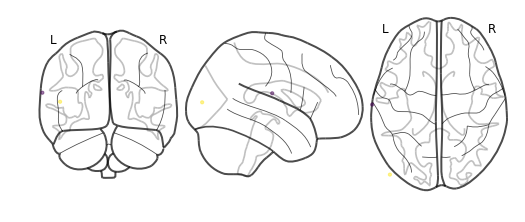

In [4]:
# import sys
# sys.path.append('/home/stepeter/AJILE/stepeter_sandbox/ECoG_Preprocessing')

mni_coords_fullfile='/data2/users/stepeter/mni_coords/cb46fd46/cb46fd46_MNI_atlasRegions.xlsx'
plot_ecog_electrodes_mni_from_file_and_labels(mni_coords_fullfile,chan_labels=['GRID1','GRID16'], num_grid_chans=64, colors=[10,2])